<a href="https://colab.research.google.com/github/ajinvinodk/M.Tech-CSP_PGP/blob/main/Autoencoder_fashion_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf

from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, losses
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Model

In [ ]:
#Load the dataset
(train_imgs, _), (test_imgs, _) = fashion_mnist.load_data()

train_imgs = train_imgs / 255.
test_imgs = test_imgs / 255.

print (train_imgs.shape)
print (test_imgs.shape)

4431872/4422102 [==============================] - 0s 0us/step
(60000, 28, 28)
(10000, 28, 28)


In [ ]:
class Autoencoder(Model):
  def __init__(self, h_dim,e_dim):
    super(Autoencoder, self).__init__()
    self.h_dim = h_dim
    self.e_dim = e_dim   
    self.encoder = tf.keras.Sequential([
      layers.Flatten(),
      layers.Dense(h_dim, activation='relu',name='h1'),
      layers.Dense(e_dim, activation='relu',name='bottle_neck'),
    ])
    self.decoder = tf.keras.Sequential([
      layers.Dense(h_dim, activation='relu',name='h2'),                                  
      layers.Dense(784, activation='sigmoid',name='out'),
      layers.Reshape((28, 28))
    ])

  def call(self, x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return decoded
h_dim = 128
e_dim = 32   
autoencoder = Autoencoder(h_dim,e_dim) 

In [ ]:
autoencoder.compile(optimizer='adam', loss=losses.BinaryCrossentropy())

In [ ]:
check = autoencoder.fit(train_imgs, train_imgs,
                epochs=2,
                shuffle=True,
                validation_data=(test_imgs, test_imgs))

Epoch 1/2
1875/1875 [==============================] - 9s 3ms/step - loss: 0.3103 - val_loss: 0.2908
Epoch 2/2
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2849 - val_loss: 0.2836


In [ ]:
print(check.history['val_loss'])

[0.29081425070762634, 0.2836000919342041]


In [ ]:
encoded_imgs = autoencoder.encoder(test_imgs).numpy()
decoded_imgs = autoencoder.decoder(encoded_imgs).numpy()

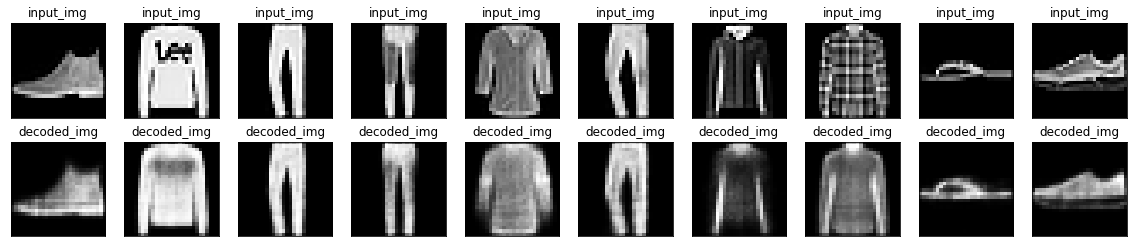

In [ ]:
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
  # display original
  ax = plt.subplot(2, n, i + 1)
  plt.imshow(test_imgs[i])
  plt.title("input_img")
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

  # display reconstruction
  ax = plt.subplot(2, n, i + 1 + n)
  plt.imshow(decoded_imgs[i])
  plt.title("decoded_img")
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
plt.show()

In [ ]:
xaxis=[]
yaxis=[]
h_dim = [16,16,32,32,64,64,128,128,256,256,512,512,700,700]
e_dim=[8,10,8,16,16,32,32,64,64,128,128,256,32,64]
for i in range(len(h_dim)):
  autoencoder = Autoencoder(h_dim[i],e_dim[i])
  autoencoder.compile(optimizer='adam', loss=losses.BinaryCrossentropy())
  check1 = autoencoder.fit(train_imgs, train_imgs,
                epochs=50,
                shuffle=True,
                validation_data=(test_imgs, test_imgs))
  p = check1.history['val_loss']
  yaxis.append(p[49])
  xaxis.append(f'{h_dim[i]}_{e_dim[i]}')
#plt.plot(xaxis,yaxis)

Epoch 1/50
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3521 - val_loss: 0.3204
Epoch 2/50
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3150 - val_loss: 0.3145
Epoch 3/50
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3112 - val_loss: 0.3120
Epoch 4/50
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3093 - val_loss: 0.3105
Epoch 5/50
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3081 - val_loss: 0.3094
Epoch 6/50
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3071 - val_loss: 0.3086
Epoch 7/50
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3063 - val_loss: 0.3080
Epoch 8/50
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3057 - val_loss: 0.3073
Epoch 9/50
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3052 - val_loss: 0.3070
Epoch 10/50
1875/1875 [==============================] - 5s 2ms/step - loss: 0.304

Text(0, 0.5, 'Final_loss')

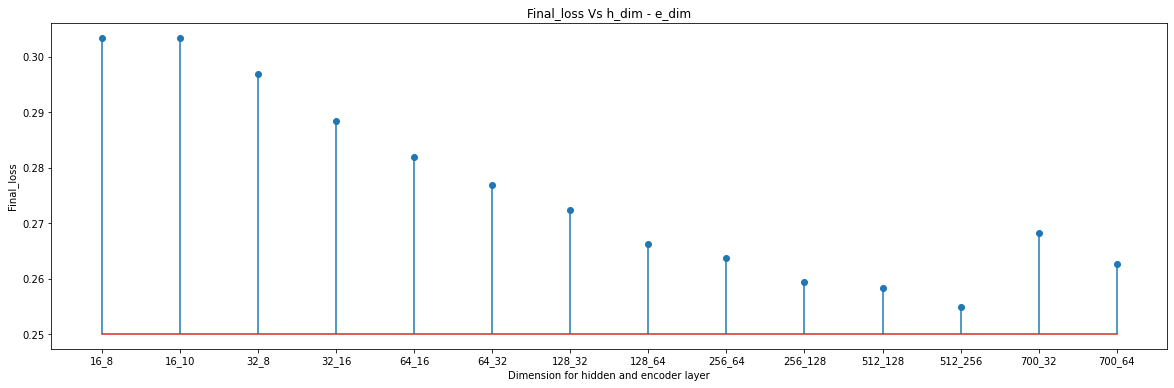

In [ ]:
plt.figure(figsize=(20, 6))

plt.stem(xaxis,yaxis,use_line_collection=True,bottom=0.25)
plt.title("Final_loss Vs h_dim - e_dim")
plt.xlabel("Dimension for hidden and encoder layer")
plt.ylabel("Final_loss")

